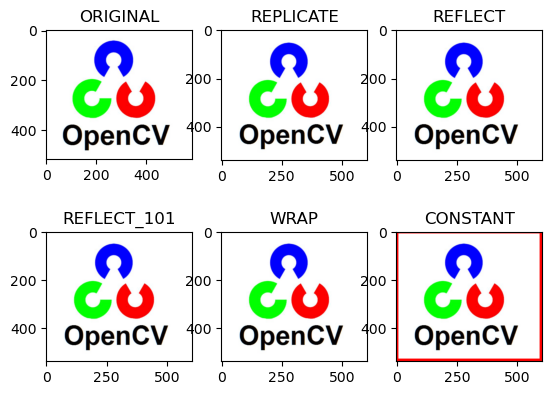

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255, 0, 0]
img1 = cv2.imread('opencv_logo.png')
replicate = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(
    img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)
plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()


In [ ]:
import cv2


# Load two images
img1 = cv2.imread('cat1.jpg')
img2 = cv2.imread('opencv_logo.png')
# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask = cv2.convertScaleAbs(mask)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:rows, 0:cols] = dst
cv2.imshow('res', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('tracking3.avi')

while(cap.isOpened()):
    # Take each frame
    _, frame = cap.read()
    if _ == False:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
